# **[LS22] UC Berkeley Admission Rate**

In [40]:
import numpy as np
import pandas as pd

<br/>

<hr style="border: 1px solid #fdb515;" />

# INSTRUCTOR ONLY: SPLIT 1 (1.2, 2.1, 2.2, 3.1, 3.2)

## Takeaways
- **1.2 Shared Reality and Modeling**
    - Feel optimistic about the capacity of science to help solve problems for societal and personal decision-making. 
    - Understand the assummption of shared reality with regular patterns and the power of empirical evidence as a way to reality
- **2.1 Senses and Instrumentation**
    - Place appropriate trust in instruments where direct observation is not possible (or less precise/ accurate)
    - Understand that interaction with reality instruments can extend the belief of a shared objective reality to objects and phenomena to which our raw senses do not have direct access
    - Understand the challenges of validating an instrument and general methods of validation
- **2.2 Systematic and Statistical Uncertainty**
    - Realize that our contact with reality is often mediated by measurement and quantification. We need to be aware that every measurement comes with some degree of uncertainty (deviation from the "true" value in reality).
    - Identify sources of measurement uncertainty/error that introduce statistical uncertainty/error, that introduce systematic uncertainty/error, and that introduce both.
    - Recognize the difficulty of removing systematic uncertainty, and that the process of science involves creativity in identifying sources of systematic uncertainty and inventing strategies to reduce or eliminate them.
- **3.1 Probabilistic Reasoning**
    -  Recognize that every claim comes with some degree of uncertainty.
    - Learn the function/utility of scientific expressions of uncertainty. - Back-up plans are important since no information is absolutely certain.
- **3.2 Calibration of Credence Level**
    - Be wary of high levels of confidence.
    - Appreciate that one can improve on the calibration of their credence levels, and one should strive to reach an accurate calibration.

<br/>

<hr style="border: 1px solid #fdb515;" />

A university's admission is related to the different aspects of the society, and often becomes a reflection on societal's values and dynamic. For this part of the assignment, we will be working with **UC Berkeley's 1973 graduate admission** dataset to further explore how gender (recorded binary during 1973: Female and Male) plays a role in admission.

Before we dive into the dataset, let's try to understand the reality presented now with your senses.

<!-- BEGIN QUESTION -->
**Question 1:**: Using your direct observation (observe around the classrooms or campus), what is a pattern you have seen about admission rate in relation to gender? How much does your senses help you understand the shared objective reality? Is there any limitations? 
- *Hint: There's no one correct answer to this question.*

_Answer here_

In [8]:
# Instructor Note/ Solution: 

# Answer may vary.

<!-- End QUESTION -->


<!-- START QUESTION -->
**Question 2**: Now, let's load our dataset `berkeley.csv` below.

In [6]:
# fill out the ... part to load data.
admission_data = ... 
admission_data.head(10)

In [16]:
# Instructor Note/ Solution: 

# make sure the csv is in the same file path as this notebook. If not, we will have tell them the path to the csv.
admission_data = pd.read_csv("berkeley.csv")
admission_data.head(10)

,Year,Major,Gender,Admission
0,1973,C,F,Rejected
1,1973,B,M,Accepted
2,1973,Other,F,Accepted
3,1973,Other,M,Accepted
4,1973,Other,M,Rejected
5,1973,Other,M,Rejected
6,1973,F,F,Accepted
7,1973,Other,M,Accepted
8,1973,Other,M,Rejected
9,1973,A,M,Accepted


<!-- END QUESTION -->


<!-- START QUESTION -->
**Question 3**: Create a new table with gender and the corresponding acceptance rate. Acceptance rate should be the count of accepted divided by total count of application. Your first column should be named `Gender` and second columns should be `Admission Rate`.
* *Hint: There should be only two rows for table.*
* *Hint: In Data C8, we learned the method `group`. Pandas have similar method called `groupby`. You can find the documentation for this method [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)*.
* *Hint: `apply` method can be helpful here! You can find the documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html).*
* *Hint: In order to make Series into DataFrame, you can use `.reset_index()`.*

In [30]:
# fill out the ... 
acceptance_rate_tbl = ...
acceptance_rate_tbl.head()

AttributeError: 'ellipsis' object has no attribute 'head'

In [36]:
# Instructor Note/ Solution

acceptance_rate_tbl = admission_data.groupby('Gender')['Admission'].apply(lambda x: (x == 'Accepted').sum() / len(x)).reset_index().rename(columns={"Admission": "Admission Rate"})
acceptance_rate_tbl.head()

,Gender,Admission Rate
0,F,0.345753
1,M,0.442786


<!-- END QUESTION -->


<!-- START QUESTION -->
**Question 4**: Using this new table, create a bar graph showing each gender's admission rate. Documentation to plot bar graph in seaborn is linked [here](https://seaborn.pydata.org/generated/seaborn.barplot.html).

<Axes: xlabel='Gender', ylabel='Admission Rate'>

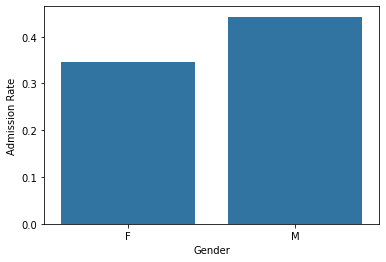

In [39]:
import seaborn as sns
sns.barplot(data=acceptance_rate_tbl, x = "Gender", y = "Admission Rate")

<!-- END QUESTION -->


<!-- START QUESTION -->
**Question 6**: How would you interpret the graph above? What does this imply about the UC Berkeley's admission rate during 1973?

_Answer here_

In [41]:
# Instructor Note/ Solution

# Students' answers may vary, but hopefully we have guided the students to believe the false narrative that male is more likely to be accepted.

<!-- END QUESTION -->


<!-- START QUESTION -->
**Question 7**: Make a claim about the 1973's UC Berkeley admisison in relation to gender. Establish a credence level to your claim and explain why. 

_Answer here_

In [ ]:
# Instructor Note/ Solution

# 

<!-- END QUESTION -->


<!-- START QUESTION -->
**Question 8**: Make a claim about the 1973's UC Berkeley admisison in relation to gender. Establish a credence level to your claim and explain why. 